A notebook for making a 100-frame movie from 3D dust for Linnea as a test

First thing we need to do is figure out how to write some json

In [1]:
import json
import numpy as np
%matplotlib inline
#%matplotlib notebook
from matplotlib import pyplot as plt

This is the camera properties, which we will fix.

In [2]:
t = True
cprops ={
    "projection": "stereographic",
    "step_size": 1,
    "max_dist": 3000.0,
    "fov": 45.0,
    "x_pix": 300,
    "y_pix": 200,
    "vmax": "auto",
    "clip_mode": "tanh",
    "fuzzy": t,
    "randomize_angles": t,
    "euler_convention": "szyz"}

Then we make an empty list of frames to which we can append frames

In [3]:
fprops = []

Linnea asked for 100 frames orbiting around a point with equal distance. We'll assume that the middle of these 100 frames is the Sun, and we'll set some sweep out angle in the Galactic Plane.

In [4]:
nframes = 100 # 100 frames
# orion is at l = 210, distance of 400 pc
x0 = np.cos(210*np.pi/180)*400
y0 = np.sin(210*np.pi/180)*400
orbit_point = np.array([x0, y0, 0]) # I think this means 500 pc toward Galactic center from the Sun...?
angle_sweep = 45 # half of this CCW and half CW from the sun

In [5]:
def sweep(xc, yc, angle_sweep, nframes):
    R = np.sqrt(xc**2+ yc**2)
    phi =np.arctan2(yc, xc)*180/np.pi
    dangs = np.linspace(0, angle_sweep, nframes)
    xs = xc - R*np.cos((phi-angle_sweep/2+dangs)*np.pi/180)
    ys = yc - R*np.sin((phi-angle_sweep/2+dangs)*np.pi/180)
    angs = (dangs-angle_sweep/2+phi)*np.pi/180 ## wait are these in RADIANs??
    return xs, ys, angs

In [6]:
xs, ys, angs = sweep(x0, y0, angle_sweep, nframes)

In [7]:
angs

array([-3.01069296, -3.00275964, -2.99482633, -2.98689302, -2.9789597 ,
       -2.97102639, -2.96309307, -2.95515976, -2.94722644, -2.93929313,
       -2.93135981, -2.9234265 , -2.91549318, -2.90755987, -2.89962655,
       -2.89169324, -2.88375992, -2.87582661, -2.86789329, -2.85995998,
       -2.85202666, -2.84409335, -2.83616003, -2.82822672, -2.8202934 ,
       -2.81236009, -2.80442678, -2.79649346, -2.78856015, -2.78062683,
       -2.77269352, -2.7647602 , -2.75682689, -2.74889357, -2.74096026,
       -2.73302694, -2.72509363, -2.71716031, -2.709227  , -2.70129368,
       -2.69336037, -2.68542705, -2.67749374, -2.66956042, -2.66162711,
       -2.65369379, -2.64576048, -2.63782716, -2.62989385, -2.62196054,
       -2.61402722, -2.60609391, -2.59816059, -2.59022728, -2.58229396,
       -2.57436065, -2.56642733, -2.55849402, -2.5505607 , -2.54262739,
       -2.53469407, -2.52676076, -2.51882744, -2.51089413, -2.50296081,
       -2.4950275 , -2.48709418, -2.47916087, -2.47122755, -2.46

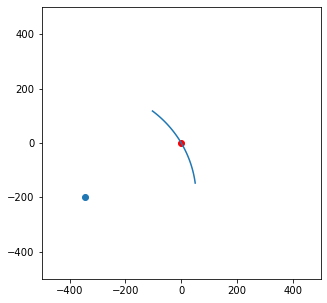

In [8]:
plt.figure(figsize=[5, 5])
plt.scatter(x0, y0)
plt.scatter(0, 0, c='red')
plt.plot(xs, ys)
plt.xlim([-500, 500])
plt.ylim([-500, 500])
plt.savefig('arc')

In [9]:
for i in range(nframes):
    fprops.append({
      "xyz": [xs[i], ys[i], 0.0],
      "angles": [angs[i], 0.0, 0.0]
    })

In [10]:
allprops = {"camera_props": cprops,"frame_props":fprops }

In [11]:
print(json.dumps(allprops,indent=2))

{
  "camera_props": {
    "projection": "stereographic",
    "step_size": 1,
    "max_dist": 3000.0,
    "fov": 45.0,
    "x_pix": 300,
    "y_pix": 200,
    "vmax": "auto",
    "clip_mode": "tanh",
    "fuzzy": true,
    "randomize_angles": true,
    "euler_convention": "szyz"
  },
  "frame_props": [
    {
      "xyz": [
        50.167783035748755,
        -147.78952311197943,
        0.0
      ],
      "angles": [
        -3.0106929596902186,
        0.0,
        0.0
      ]
    },
    {
      "xyz": [
        49.74110548902928,
        -144.64502143372684,
        0.0
      ],
      "angles": [
        -3.002759644908426,
        0.0,
        0.0
      ]
    },
    {
      "xyz": [
        49.28949530927508,
        -141.5040036402484,
        0.0
      ],
      "angles": [
        -2.9948263301266342,
        0.0,
        0.0
      ]
    },
    {
      "xyz": [
        48.812980919545225,
        -138.36666741826176,
        0.0
      ],
      "angles": [
        -2.986893015344841

In [12]:
with open('test_100.json', 'w') as outfile:
    json.dump(allprops, outfile,indent=2)

In [13]:
!python3 project_frames.py test_100.json /Users/jegpeek/leike2020_bayestar19_splice.npy "test100_{:05d}.png"   
!/Users/jegpeek/ffmpeg -r 30 -start_number 0 -i test100_%05d.png -c:v libx264 -s 600x400 -r 30 -pix_fmt yuv420p test100_5.mp4



Loaded specifications for 100 images.
0.397824734759316
Loading map ...
Ray-casting frames ...
N/A% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--frame 0: vmax = 0.09158262547314007
  1% (1 of 100) |                        | Elapsed Time: 0:00:28 ETA:   0:47:01frame 1: vmax = 0.09348776184727285
  2% (2 of 100) |                        | Elapsed Time: 0:00:57 ETA:   0:46:36frame 2: vmax = 0.09264683689985395
  3% (3 of 100) |                        | Elapsed Time: 0:01:26 ETA:   0:47:36frame 3: vmax = 0.09240694690702003
  4% (4 of 100) |                        | Elapsed Time: 0:01:55 ETA:   0:46:58frame 4: vmax = 0.09205958308345907
  5% (5 of 100) |#                       | Elapsed Time: 0:02:26 ETA:   0:47:54frame 5: vmax = 0.08733173294943117
  6% (6 of 100) |#                       | Elapsed Time: 0:02:56 ETA:   0:47:29frame 6: vmax = 0.09918345444790976
  7% (7 of 100) |#                       | Elapsed Time: 0:03:26 ETA:   0:46:26frame 7: vmax = 0.102

 70% (70 of 100) |################       | Elapsed Time: 0:34:02 ETA:   0:14:56frame 70: vmax = 0.09070147523658124
 71% (71 of 100) |################       | Elapsed Time: 0:34:33 ETA:   0:14:31frame 71: vmax = 0.09432930792878688
 72% (72 of 100) |################       | Elapsed Time: 0:35:03 ETA:   0:14:01frame 72: vmax = 0.08823840805327927
 73% (73 of 100) |################       | Elapsed Time: 0:35:33 ETA:   0:13:45frame 73: vmax = 0.08205286917648846
 74% (74 of 100) |#################      | Elapsed Time: 0:36:04 ETA:   0:13:16frame 74: vmax = 0.08304542943256456
 75% (75 of 100) |#################      | Elapsed Time: 0:36:34 ETA:   0:12:35frame 75: vmax = 0.10706457874802436
 76% (76 of 100) |#################      | Elapsed Time: 0:37:05 ETA:   0:12:24frame 76: vmax = 0.07553774662628349
 77% (77 of 100) |#################      | Elapsed Time: 0:37:36 ETA:   0:11:52frame 77: vmax = 0.10012758416573343
 78% (78 of 100) |#################      | Elapsed Time: 0:38:06 ETA:   

In [14]:
#python3 project_frames.py test100.json /Users/jegpeek/leike2020_bayestar19_splice.npy "test100_{:05d}.png"
#/Users/jegpeek/ffmpeg -r 30 -start_number 0 -i pattern_%05d.png -c:v libx264 -s 600x400 -r 30 -pix_fmt yuv420p test3.mp4

#/Users/jegpeek/ffmpeg -r 30 -start_number 0 -i test100_%05d.png -c:v libx264 -s 600x400 -r 30 -pix_fmt yuv420p test100.mp4